<a href="https://colab.research.google.com/github/oghacker001/histopathological-Image/blob/main/Preprocessingimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FileUpload(value={}, accept='image/*', description='Upload')

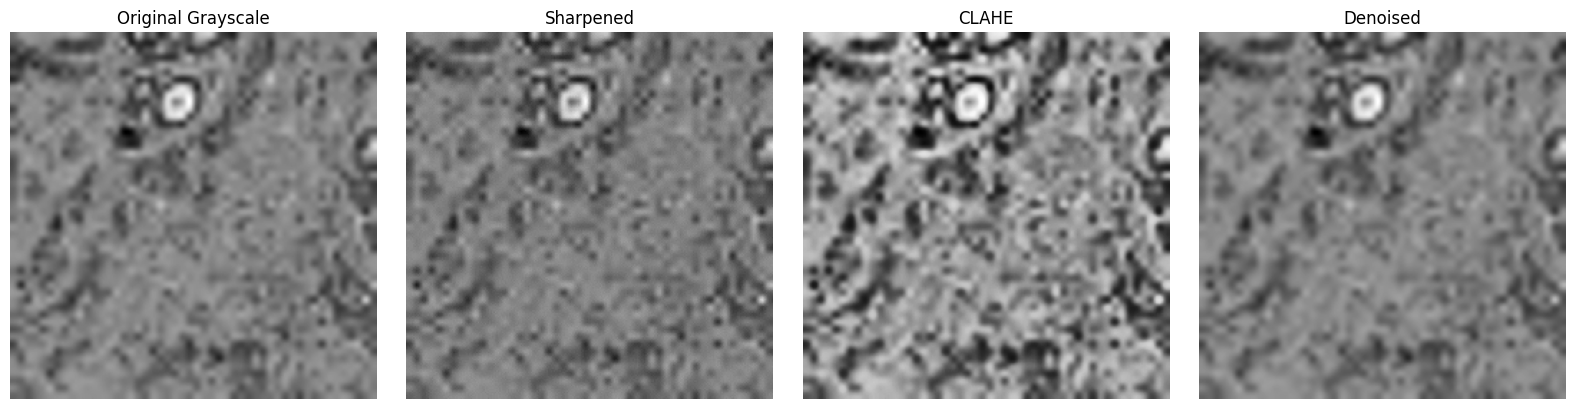

In [16]:
from IPython.display import display
import ipywidgets as widgets
from PIL import Image
import numpy as np
import io
import cv2
import matplotlib.pyplot as plt

uploader = widgets.FileUpload(accept='image/*', multiple=False)
display(uploader)

In [17]:
def on_upload_change(change):
    if uploader.value:
        file_info = list(uploader.value.values())[0]
        img_data = file_info['content']
        img = Image.open(io.BytesIO(img_data)).convert("RGB")
        img = img.resize((256, 256))
        img_cv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
        gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)

        # Preprocessing
        sharpened = cv2.filter2D(gray, -1, np.array([[0, -1, 0],
                                                    [-1, 5, -1],
                                                     [0, -1, 0]]))
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)).apply(gray)
        denoised = cv2.GaussianBlur(gray, (5, 5), 0)

        # Show results
        titles = ["Original Grayscale", "Sharpened", "CLAHE", "Denoised"]
        images = [gray, sharpened, clahe, denoised]
        plt.figure(figsize=(16, 4))
        for i in range(4):
            plt.subplot(1, 4, i + 1)
            plt.imshow(images[i], cmap='gray')
            plt.title(titles[i])
            plt.axis('off')
        plt.tight_layout()
        plt.show()

uploader.observe(on_upload_change, names='value')